SUPERSTORE SALES ANALYSIS

Import libraries

In [22]:
import numpy as np
import os
import glob
import urllib.request
import pandas as pd
import csv
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [23]:
sps_data=pd.read_excel('Superstore.xls')

In [24]:
sps_data.reset_index(drop=True, inplace=True)


   DATA CLEANING AND PREPATION

In [25]:
sps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [26]:
sps_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [27]:
sps_data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
sps_data.size

209874

In [29]:
sps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [30]:
sps_data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [31]:
sps_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [32]:
sps_data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [33]:
list(set(sps_data['Region'].values.tolist()))

['West', 'East', 'Central', 'South']

In [34]:
set(sps_data['Product Name'].values.tolist())

{'Fellowes Super Stor/Drawer',
 'Lumber Crayons',
 'Motorla HX550 Universal Bluetooth Headset',
 'Xerox 1914',
 'GBC Standard Recycled Report Covers, Clear Plastic Sheets',
 'Imation\xa0USB 2.0 Swivel\xa0Flash Drive\xa0USB\xa0flash drive\xa0- 4 GB - Pink',
 'Logitech B530 USB\xa0Headset\xa0-\xa0headset\xa0- Full size, Binaural',
 'Memorex Mini Travel Drive 4 GB USB 2.0 Flash Drive',
 'Xerox 1896',
 'Southworth 25% Cotton Antique Laid Paper & Envelopes',
 'Acco Translucent Poly Ring Binders',
 'Bevis Boat-Shaped Conference Table',
 'Sony 8GB Class 10 Micro SDHC R40 Memory Card',
 'Eldon Gobal File Keepers',
 'Avery 52',
 'Fellowes Advanced 8 Outlet Surge Suppressor with Phone/Fax Protection',
 'Imation\xa032GB Pocket Pro USB 3.0\xa0Flash Drive\xa0- 32 GB - Black - 1 P ...',
 'Avery Hi-Liter Pen Style Six-Color Fluorescent Set',
 'Enermax Briskie RF Wireless Keyboard and Mouse Combo',
 'Bush Heritage Pine Collection 5-Shelf Bookcase, Albany Pine Finish, *Special Order',
 'Bevis Round Con

In [35]:
sps_data['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Eureka Hand Vacuum, Bagless', 'LG G2',
       'Eldon Jumbo ProFile Portable File Boxes Graphite/Black'],
      dtype=object)

<AxesSubplot:xlabel='Region'>

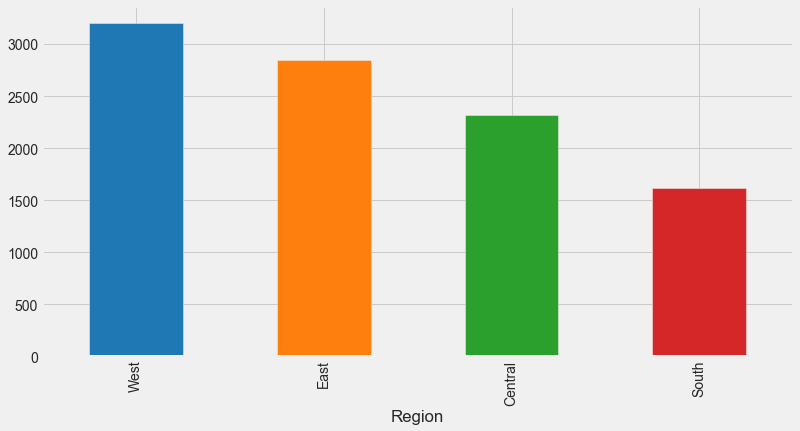

In [36]:
Sale=sps_data.groupby('Region').size().sort_values(ascending=False)
Sale.plot(kind='bar',figsize=(12,6), color=sns.color_palette("tab10"))

The west has the highest number of sales in comparison to the rest of the region.

<AxesSubplot:title={'center':'Shipmode vs Sum of Quantity'}, xlabel='Shipmode with Category', ylabel='Sum of Quantity'>

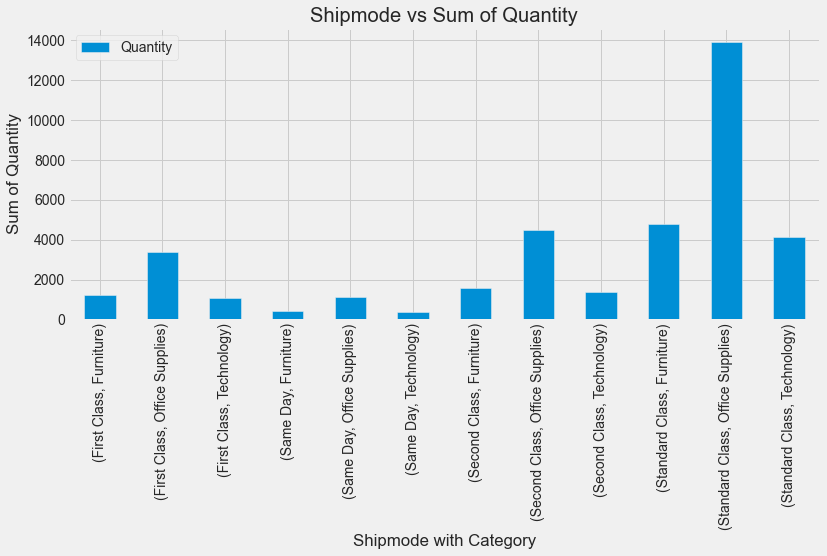

In [37]:
df_Shipmode=sps_data[['Ship Mode', 'Category', 'Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
df_Shipmode.plot.bar(title='Shipmode vs Sum of Quantity', ylabel='Sum of Quantity', xlabel='Shipmode with Category', figsize=(12,5))


The shows the quantity supplied in terms of the shipmode and category. Standard class ship mode and office supploes category has the highest quantity sold.

<AxesSubplot:title={'center':'Shipmode vs Sum of Sales'}, xlabel='Shipmode with Category', ylabel='Sum of Sales'>

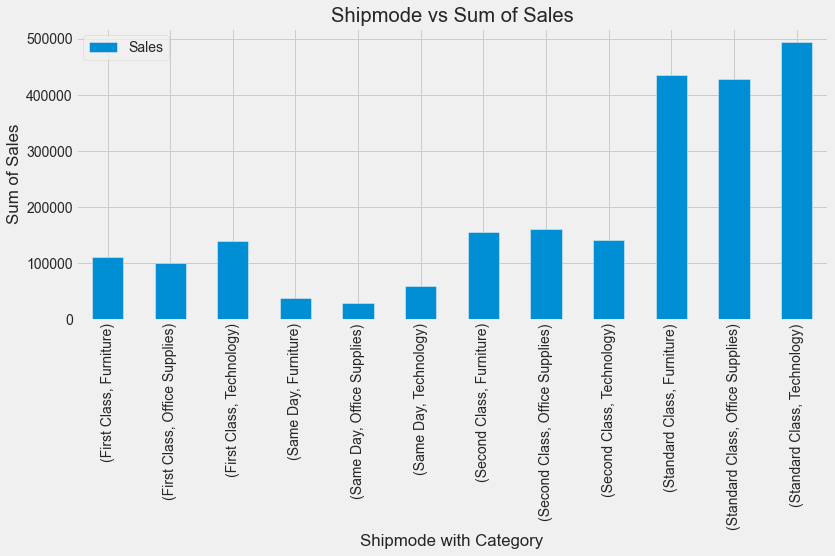

In [38]:
df_Shipmode=sps_data[['Ship Mode', 'Category', 'Sales']].groupby(['Ship Mode','Category']).sum('Sales')
df_Shipmode.plot.bar(title='Shipmode vs Sum of Sales', ylabel='Sum of Sales', xlabel='Shipmode with Category', figsize=(12,5))

All the standard class has the highest number of sales. Office technology has the highest sales among the standard class

In [39]:
City_sales_df=pd.pivot_table(data=sps_data[['City', 'Sales']], index=['City'],
                                                         values=['Sales'],
                                                           aggfunc='max')



<AxesSubplot:title={'center':'City Vs MAximum Sales'}, xlabel='City'>

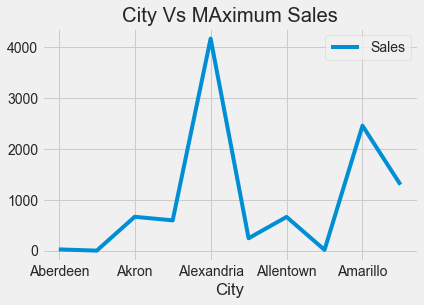

In [40]:
City_sales_df.head(10).plot(kind='line', title= 'City Vs MAximum Sales')

Alexandia city  recorded the highest sales among all the cities.

In [41]:
City_profit_df=pd.pivot_table(data=sps_data[['City', 'Profit']], index=['City'], values=['Profit'], aggfunc='max')

<AxesSubplot:title={'center':'City Vs MAximum Profit'}, xlabel='City'>

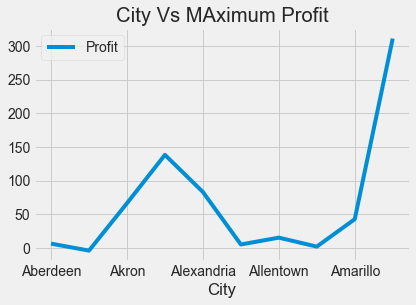

In [42]:
City_profit_df.head(10).plot(kind='line', title= 'City Vs MAximum Profit')

Although Alexandria city has the highest sales record, but Amarillo record the highest profit. This might probably be influenced by the category of product.

<AxesSubplot:title={'center':'Segment Vs MAximum Sales'}, xlabel='Segment'>

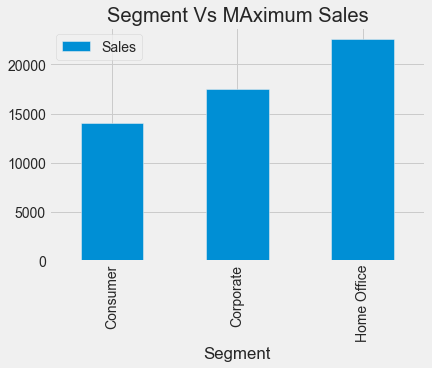

In [43]:
Segment_sales_df=pd.pivot_table(data=sps_data[['Segment', 'Sales']], index=['Segment'],
                                                         values=['Sales'],
                                                           aggfunc='max')
Segment_sales_df.head(10).plot(kind='bar', title= 'Segment Vs MAximum Sales')

<AxesSubplot:title={'center':'Category Vs MAximum Sales'}, xlabel='Category,Sub-Category'>

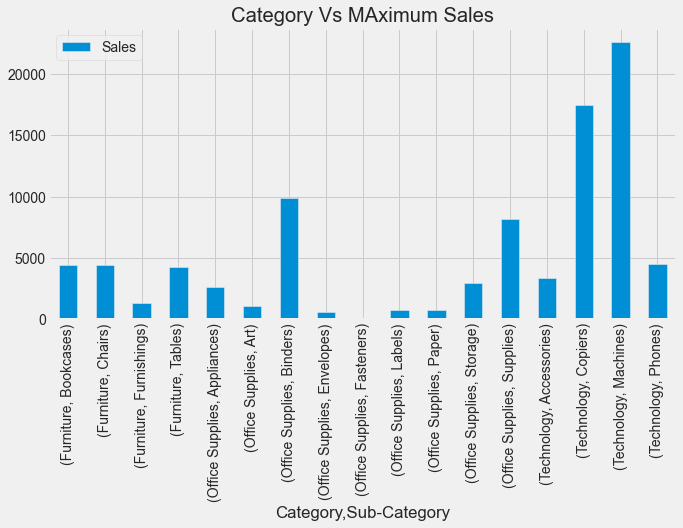

In [44]:
Category_sales_df=pd.pivot_table(data=sps_data[['Category', 'Sub-Category','Sales']], index=['Category', 'Sub-Category'],
                                                         values=['Sales'],
                                                           aggfunc='max')
Category_sales_df.plot(kind='bar', title= 'Category Vs MAximum Sales', figsize=(10,5))

<AxesSubplot:title={'center':'Category Vs Maximum Sales'}, xlabel='Category,Sub-Category'>

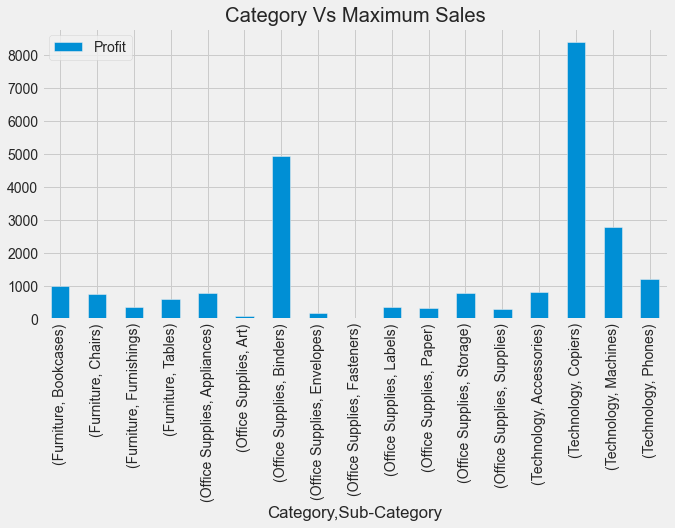

In [45]:
Category_profit_df=pd.pivot_table(data=sps_data[['Category', 'Sub-Category','Profit']], index=['Category', 'Sub-Category'],
                                                         values=['Profit'],
                                                           aggfunc='max')
Category_profit_df.plot(kind='bar', title= 'Category Vs Maximum Sales', figsize=(10,5))